# 1. Introduction

## Lead Scoring

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

# 2. Preprocessing 

#### 2.1 Import packages

In [582]:
# Importing required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [583]:
# Read data
df = pd.read_csv('/content/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [584]:
# Shape of DataFrame
df.shape

(9240, 37)

In [585]:
# Let's check the information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [586]:
# Let's statistical summary of the DataFrame
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### 2.2 Handling Missing Values

In [587]:
# Creating a DataFrame for Columns and their null values percentage
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null.rename(columns={'index':'Column'},inplace=True)
print(df_null.head(3))
# Getting columns with high null values percentage
df_high_null = df_null[df_null['% Null']>25].sort_values(by='% Null')
# Columns in the above set will be dropped
cols_to_drop = df_high_null.Column.values
cols_to_drop = cols_to_drop[2:]
# Getting columns with low null values percentage
df_low_null = df_null[df_null['% Null']<25].sort_values(by='% Null')

        Column  % Null
0  Prospect ID     0.0
1  Lead Number     0.0
2  Lead Origin     0.0


In [588]:
# Dropping Columns with high null values
df.drop(labels=list(cols_to_drop),inplace=True,axis=1)
# Dropping Rows where null values were less 
df.dropna(inplace=True,axis=0)
# Checking results
df.isna().sum()
print("Shape after handling missing values",df.shape)

Shape after handling missing values (4925, 29)


### 2.3 Data Validation

In [589]:
# Creating a list of Object data type columns
obj_cols = df.select_dtypes(np.object).columns.tolist()

In [590]:
# Checking the categorical values in the Object columns
def check_value_counts(col_list):
  for col in col_list:
    print('-----------------------------')
    print(round((df[col].value_counts()/df.shape[0])*100,2))
    print('-----------------------------')

check_value_counts(obj_cols)

-----------------------------
121a8c8e-3b13-4cb1-9545-11531bda8a9c    0.02
086ca890-6680-45eb-9925-93b856712985    0.02
696eeb71-28d1-4f4c-a5ea-03682281589f    0.02
1b38a597-5dc8-4a2f-ad8f-ff4ebb4699a0    0.02
3d00ebc9-6040-40f7-8494-f6c86aff822d    0.02
                                        ... 
2787c4c7-a39c-4463-bb60-c41dabb158b6    0.02
6f2ca9ae-1ed2-44be-b852-c74e3556d4dc    0.02
9cb03fe8-ec64-4f08-9b66-4f64fac7f6ed    0.02
d6310ca5-442f-4717-800c-68251c44e540    0.02
b2b5c39c-1c13-4714-87ac-8fd4fcbace6e    0.02
Name: Prospect ID, Length: 4925, dtype: float64
-----------------------------
-----------------------------
Landing Page Submission    73.06
API                        26.40
Lead Add Form               0.55
Name: Lead Origin, dtype: float64
-----------------------------
-----------------------------
Google               41.18
Direct Traffic       37.69
Organic Search       17.46
Olark Chat            1.48
Referral Sites        1.44
Reference             0.43
Welingak Web

In [591]:
def drop_cols(col_list):
  df.drop(labels=col_list,inplace=True,axis=1)
  print("Shape after dropping columns:",df.shape)

In [592]:
# Dropping columns which have highly imbalanced values in the dataset
cols_to_drop_2 = ['Do Not Call','Search','Magazine','Digital Advertisement','Newspaper Article','X Education Forums','Newspaper','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']
drop_cols(cols_to_drop_2)

Shape after dropping columns: (4925, 17)


In [593]:
# Dropping columns which do not add value to the dataset
cols_to_drop_3 = ['Prospect ID','How did you hear about X Education','Country','City','Do Not Email']
drop_cols(cols_to_drop_3)

Shape after dropping columns: (4925, 12)


In [594]:
# Specialization columns has value as 'Select', we can consider this error as 'Other' category
df['Specialization'] = df['Specialization'].apply(lambda x:'Other' if x=='Select' else x)

In [595]:
df['Specialization'].value_counts()

Other                                906
Finance Management                   657
Human Resource Management            576
Marketing Management                 553
Operations Management                349
Business Administration              277
IT Projects Management               258
Supply Chain Management              251
Banking, Investment And Insurance    230
Media and Advertising                152
Travel and Tourism                   145
International Business               128
Healthcare Management                101
Hospitality Management                78
Retail Management                     74
E-COMMERCE                            74
Rural and Agribusiness                52
E-Business                            41
Services Excellence                   23
Name: Specialization, dtype: int64

In [596]:
df.drop(labels='Lead Number',inplace=True,axis=1)

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4925 entries, 1 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             4925 non-null   object 
 1   Lead Source                             4925 non-null   object 
 2   Converted                               4925 non-null   int64  
 3   TotalVisits                             4925 non-null   float64
 4   Total Time Spent on Website             4925 non-null   int64  
 5   Page Views Per Visit                    4925 non-null   float64
 6   Last Activity                           4925 non-null   object 
 7   Specialization                          4925 non-null   object 
 8   What is your current occupation         4925 non-null   object 
 9   A free copy of Mastering The Interview  4925 non-null   object 
 10  Last Notable Activity                   4925 non-null   obje

### 2.4 Encoding and Dummy Variables

In [598]:
df['A free copy of Mastering The Interview'].value_counts()

No     2770
Yes    2155
Name: A free copy of Mastering The Interview, dtype: int64

In [599]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x:1 if x=='Yes' else 0)

In [600]:
# Creating a list of object columns
obj_cols = df.select_dtypes(np.object).columns.tolist()
obj_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Last Notable Activity']

In [601]:
# Subsetting object columns dataset
df_obj = df[obj_cols]
# Creating dummy variables
df_obj = pd.get_dummies(df_obj, drop_first=True)
print(df_obj.head())

   Lead Origin_Landing Page Submission  ...  Last Notable Activity_View in browser link Clicked
1                                    0  ...                                                  0 
2                                    1  ...                                                  0 
3                                    1  ...                                                  0 
4                                    1  ...                                                  0 
6                                    1  ...                                                  0 

[5 rows x 67 columns]


In [602]:
# Merging datasets
df_final = pd.concat([df,df_obj], axis=1)
df_final.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Unemployed,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,Landing Page Submission,Google,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [603]:
# Dropping original features
df_final.drop(labels=['Specialization_Other']+obj_cols,inplace=True,axis=1)

In [604]:
print("Shape of the DataFrame after creating dummy variables:",df_final.shape)

Shape of the DataFrame after creating dummy variables: (4925, 71)


### 2.5 Correlation Matrix

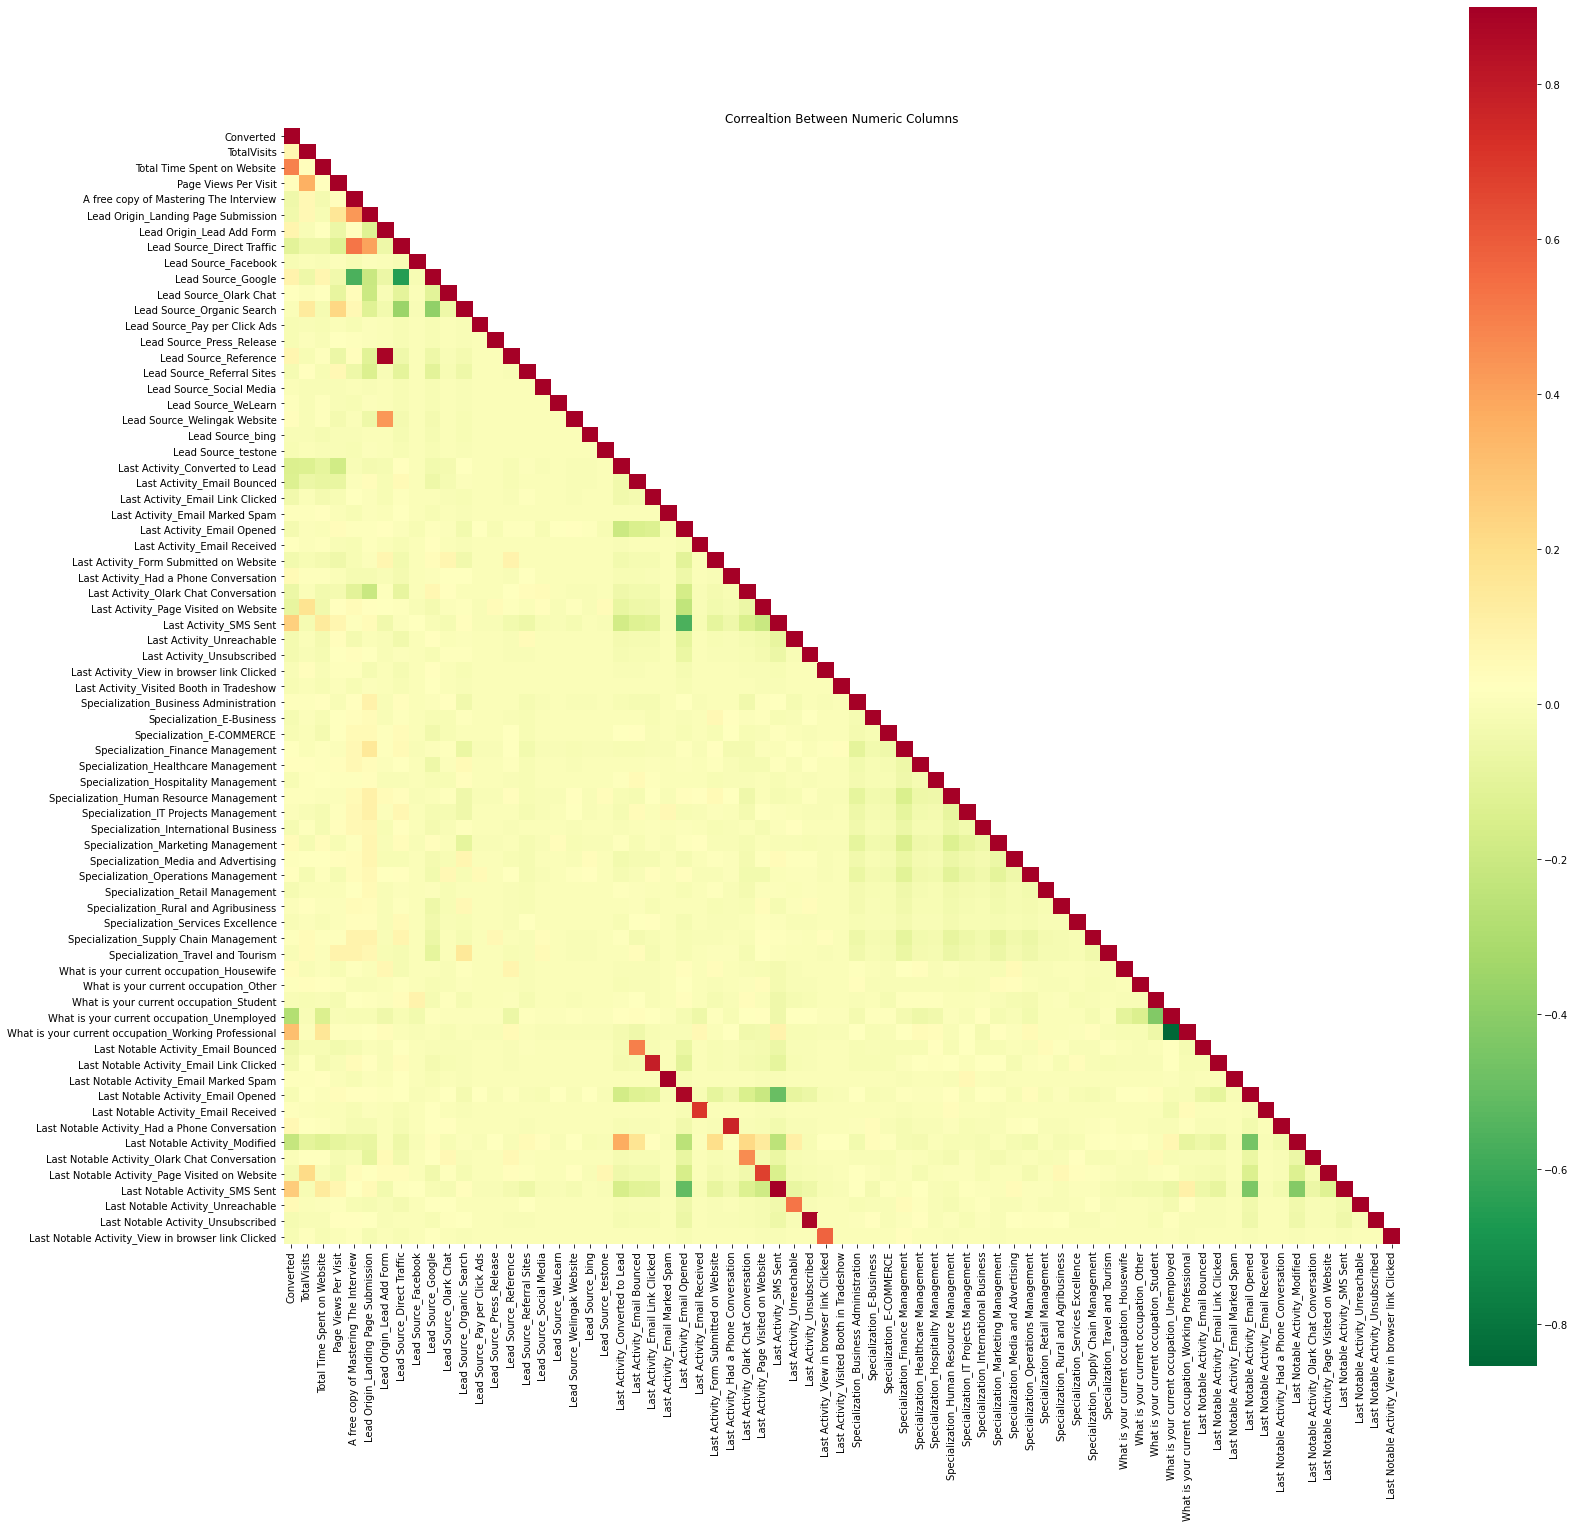

In [605]:
#Firstly, creating the correlation matrix
corr_mat = df_final.corr()
corr_mat_mask = np.array(corr_mat)
#Creating a heatmap
corr_mat_mask[np.tril_indices_from(corr_mat)] = False
plt.figure(figsize=[25,25])
sns.heatmap(corr_mat, mask=corr_mat_mask, vmax=.9, square=True, cmap='RdYlGn_r').set(title='Correaltion Between Numeric Columns');
plt.show()

### 2.6 Train-Test Split

In [606]:
# Import required methods
from sklearn.model_selection import train_test_split

# Creating a list of numeric features
scale_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Creating Features and Dependent variable sets
X = df_final.drop(labels='Converted',axis=1)
y = df_final['Converted']

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.3, random_state=21) 

### 2.7 Feature Scaling

In [607]:
# Performing Standard Scaling on the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

# 3. Model building

##### 3.1 Model 1

In [608]:
# Importing Logistic Regressor model
from sklearn.linear_model import LogisticRegression

In [609]:
# Importing the package for statistical modelling
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a function to create a statsmodel
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.GLM(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

# Creating a function to check the VIF values    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 5)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [610]:
# Importing the RFE: Recursive Feature Elimination
from sklearn.feature_selection import RFE

In [611]:
# Creating a function to return columns which are to be eliminated
def Check_RFE(model, X_train, y_train, n_feat):
  rfe = RFE(model, n_feat)
  rfe = rfe.fit(X_train, y_train)
  ref_df = pd.DataFrame(data={'Column':X_train.columns.to_list(),'RFE':rfe.support_,'Rank':rfe.ranking_})
  res = ref_df.sort_values(by=['Rank'],ascending=True)
  return res[res['RFE']==False]
  

In [612]:
# Creating a fucntion to build a logistics regression model
def Build_LogModel(model_no, X_train, y_train):
  logmodel = LogisticRegression()
  logmodel.fit(X_train,y_train)
  return print("Model "+str(model_no)+":",logmodel.fit(X_train,y_train))

In [613]:
Build_LogModel(1, X_train, y_train)

Model 1: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [614]:
X_train_new = build_model(X_train, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3383
Model Family:                Gaussian   Df Model:                           63
Link Function:               identity   Scale:                         0.15130
Method:                          IRLS   Log-Likelihood:                -1604.0
Date:                Wed, 08 Sep 2021   Deviance:                       511.85
Time:                        16:54:49   Pearson chi2:                     512.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [615]:
checkVIF(X_train_new)

,Features,VIF
9,Lead Source_Google,inf
60,Last Notable Activity_Email Marked Spam,inf
17,Lead Source_WeLearn,inf
16,Lead Source_Social Media,inf
15,Lead Source_Referral Sites,inf
...,...,...
8,Lead Source_Facebook,NaN
12,Lead Source_Pay per Click Ads,NaN
19,Lead Source_bing,NaN
20,Lead Source_testone,NaN


In [616]:
Check_RFE(logmodel,X_train,y_train,50)

,Column,RFE,Rank
8,Lead Source_Google,False,2
58,Last Notable Activity_Email Link Clicked,False,3
22,Last Activity_Email Link Clicked,False,4
2,Page Views Per Visit,False,5
66,Last Notable Activity_SMS Sent,False,6
47,Specialization_Retail Management,False,7
31,Last Activity_Unreachable,False,8
12,Lead Source_Press_Release,False,9
23,Last Activity_Email Marked Spam,False,10
57,Last Notable Activity_Email Bounced,False,11


##### 3.2 Model 2

In [617]:
X_train_2 = X_train.drop(labels=['Last Activity_SMS Sent','Last Activity_Email Opened','Last Notable Activity_Email Opened','Last Notable Activity_Modified','Last Notable Activity_SMS Sent','Last Notable Activity_Page Visited on Website','Lead Source_Google','Last Notable Activity_Email Marked Spam','Lead Source_WeLearn','Lead Source_Social Media','Lead Source_Social Media','Lead Source_Referral Sites','Lead Source_Pay per Click Ads','Lead Source_testone','Lead Source_bing','Last Notable Activity_Email Received','Lead Source_Facebook','Last Activity_Email Received','A free copy of Mastering The Interview','Last Activity_View in browser link Clicked','Last Activity_Visited Booth in Tradeshow','Last Notable Activity_Email Marked Spam'],axis=1)
X_test_2 = X_test.drop(labels=['Last Activity_SMS Sent','Last Activity_Email Opened','Last Notable Activity_Email Opened','Last Notable Activity_Modified','Last Notable Activity_SMS Sent','Last Notable Activity_Page Visited on Website','Lead Source_Google','Last Notable Activity_Email Marked Spam','Lead Source_WeLearn','Lead Source_Social Media','Lead Source_Social Media','Lead Source_Referral Sites','Lead Source_Pay per Click Ads','Lead Source_testone','Lead Source_bing','Last Notable Activity_Email Received','Lead Source_Facebook','Last Activity_Email Received','A free copy of Mastering The Interview','Last Activity_View in browser link Clicked','Last Activity_Visited Booth in Tradeshow','Last Notable Activity_Email Marked Spam'],axis=1)
                       
X_train_new = build_model(X_train_2, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3396
Model Family:                Gaussian   Df Model:                           50
Link Function:               identity   Scale:                         0.15668
Method:                          IRLS   Log-Likelihood:                -1670.8
Date:                Wed, 08 Sep 2021   Deviance:                       532.07
Time:                        16:54:53   Pearson chi2:                     532.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [618]:
checkVIF(X_train_new)

,Features,VIF
0,const,895.92074
42,What is your current occupation_Unemployed,101.47856
43,What is your current occupation_Working Profes...,79.74988
41,What is your current occupation_Student,23.93811
5,Lead Origin_Lead Add Form,19.01740
10,Lead Source_Reference,16.01600
40,What is your current occupation_Other,4.09179
11,Lead Source_Welingak Website,4.00689
21,Last Activity_Unsubscribed,4.00649
49,Last Notable Activity_Unsubscribed,3.99496


In [619]:
Build_LogModel(2, X_train_2, y_train)
Check_RFE(logmodel,X_train_2,y_train,40)

Model 2: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Column,RFE,Rank
22,Specialization_E-Business,False,2
49,Last Notable Activity_View in browser link Cli...,False,3
0,TotalVisits,False,4
2,Page Views Per Visit,False,5
6,Lead Source_Olark Chat,False,6
7,Lead Source_Organic Search,False,7
8,Lead Source_Press_Release,False,8
14,Last Activity_Email Marked Spam,False,9
46,Last Notable Activity_Olark Chat Conversation,False,10
33,Specialization_Retail Management,False,11


##### 3.3 Model 3

In [620]:
X_train_3 = X_train_2.drop(labels=['What is your current occupation_Unemployed','What is your current occupation_Working Professional','What is your current occupation_Student','Specialization_Retail Management','Last Notable Activity_Olark Chat Conversation','Last Activity_Email Marked Spam','Lead Source_Press_Release','Lead Source_Organic Search','Lead Source_Olark Chat','Page Views Per Visit'],axis=1)
X_test_3 = X_test_2.drop(labels=['What is your current occupation_Unemployed','What is your current occupation_Working Professional','What is your current occupation_Student','Specialization_Retail Management','Last Notable Activity_Olark Chat Conversation','Last Activity_Email Marked Spam','Lead Source_Press_Release','Lead Source_Organic Search','Lead Source_Olark Chat','Page Views Per Visit'],axis=1)

X_train_new = build_model(X_train_3, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3406
Model Family:                Gaussian   Df Model:                           40
Link Function:               identity   Scale:                         0.16927
Method:                          IRLS   Log-Likelihood:                -1809.1
Date:                Wed, 08 Sep 2021   Deviance:                       576.54
Time:                        16:54:55   Pearson chi2:                     577.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [621]:
checkVIF(X_train_new)

,Features,VIF
4,Lead Origin_Lead Add Form,19.00140
6,Lead Source_Reference,16.00815
0,const,5.53632
7,Lead Source_Welingak Website,4.00673
16,Last Activity_Unsubscribed,4.00498
39,Last Notable Activity_Unsubscribed,3.99188
12,Last Activity_Had a Phone Conversation,3.51991
37,Last Notable Activity_Had a Phone Conversation,3.51723
10,Last Activity_Email Link Clicked,2.45016
36,Last Notable Activity_Email Link Clicked,2.43821


In [622]:
Build_LogModel(3, X_train_3, y_train)
Check_RFE(logmodel,X_train_3,y_train,30)

Model 3: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Column,RFE,Rank
26,Specialization_Media and Advertising,False,2
16,Specialization_Business Administration,False,3
31,Specialization_Travel and Tourism,False,4
2,Lead Origin_Landing Page Submission,False,5
24,Specialization_International Business,False,6
17,Specialization_E-Business,False,7
39,Last Notable Activity_View in browser link Cli...,False,8
6,Lead Source_Welingak Website,False,9
0,TotalVisits,False,10
21,Specialization_Hospitality Management,False,11


##### 3.4 Model 4

In [623]:
X_train_4 = X_train_3.drop(labels=['Lead Origin_Lead Add Form','Lead Source_Reference','Specialization_Hospitality Management','TotalVisits','Lead Source_Welingak Website','Specialization_E-Business','Last Notable Activity_View in browser link Clicked','Specialization_International Business','Lead Origin_Landing Page Submission','Specialization_Travel and Tourism'],axis=1)
X_test_4 = X_test_3.drop(labels=['Lead Origin_Lead Add Form','Lead Source_Reference','Specialization_Hospitality Management','TotalVisits','Lead Source_Welingak Website','Specialization_E-Business','Last Notable Activity_View in browser link Clicked','Specialization_International Business','Lead Origin_Landing Page Submission','Specialization_Travel and Tourism'],axis=1)

X_train_new = build_model(X_train_4, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3416
Model Family:                Gaussian   Df Model:                           30
Link Function:               identity   Scale:                         0.17148
Method:                          IRLS   Log-Likelihood:                -1836.5
Date:                Wed, 08 Sep 2021   Deviance:                       585.78
Time:                        16:54:56   Pearson chi2:                     586.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [624]:
checkVIF(X_train_new)

,Features,VIF
11,Last Activity_Unsubscribed,4.00397
30,Last Notable Activity_Unsubscribed,3.98983
0,const,3.86827
7,Last Activity_Had a Phone Conversation,3.51858
28,Last Notable Activity_Had a Phone Conversation,3.51015
5,Last Activity_Email Link Clicked,2.44628
27,Last Notable Activity_Email Link Clicked,2.43624
10,Last Activity_Unreachable,1.38617
29,Last Notable Activity_Unreachable,1.37869
4,Last Activity_Email Bounced,1.33507


In [625]:
Build_LogModel(4, X_train_4, y_train)
Check_RFE(logmodel,X_train_4,y_train,15)

Model 4: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Column,RFE,Rank
25,Last Notable Activity_Email Bounced,False,2
17,Specialization_Marketing Management,False,3
14,Specialization_Healthcare Management,False,4
4,Last Activity_Email Link Clicked,False,5
26,Last Notable Activity_Email Link Clicked,False,6
5,Last Activity_Form Submitted on Website,False,7
19,Specialization_Operations Management,False,8
12,Specialization_E-COMMERCE,False,9
20,Specialization_Rural and Agribusiness,False,10
16,Specialization_IT Projects Management,False,11


##### 3.5 Model 5

In [626]:
X_train_5 = X_train_4.drop(labels=['Specialization_Media and Advertising','Specialization_Rural and Agribusiness','Last Notable Activity_Email Bounced','Last Notable Activity_Email Link Clicked','Last Notable Activity_Had a Phone Conversation','Last Notable Activity_Unsubscribed','Last Activity_Had a Phone Conversation'],axis=1)
X_test_5 = X_test_4.drop(labels=['Specialization_Media and Advertising','Specialization_Rural and Agribusiness','Last Notable Activity_Email Bounced','Last Notable Activity_Email Link Clicked','Last Notable Activity_Had a Phone Conversation','Last Notable Activity_Unsubscribed','Last Activity_Had a Phone Conversation'],axis=1)

X_train_new = build_model(X_train_5, y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3423
Model Family:                Gaussian   Df Model:                           23
Link Function:               identity   Scale:                         0.17186
Method:                          IRLS   Log-Likelihood:                -1843.9
Date:                Wed, 08 Sep 2021   Deviance:                       588.29
Time:                        16:54:57   Pearson chi2:                     588.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [627]:
Build_LogModel(5, X_train_5, y_train)
Check_RFE(logmodel,X_train_5,y_train,8)

Model 5: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Column,RFE,Rank
7,Last Activity_Page Visited on Website,False,2
1,Lead Source_Direct Traffic,False,3
18,Specialization_Services Excellence,False,4
21,What is your current occupation_Other,False,5
16,Specialization_Marketing Management,False,6
13,Specialization_Healthcare Management,False,7
5,Last Activity_Form Submitted on Website,False,8
4,Last Activity_Email Link Clicked,False,9
17,Specialization_Operations Management,False,10
11,Specialization_E-COMMERCE,False,11


##### 3.6 Model 6

In [628]:
X_train_6 = X_train_5.drop(labels=['Specialization_Business Administration','Specialization_E-COMMERCE','What is your current occupation_Other','Last Activity_Email Link Clicked'],axis=1)
X_test_6 = X_test_5.drop(labels=['Specialization_Business Administration','Specialization_E-COMMERCE','What is your current occupation_Other','Last Activity_Email Link Clicked'],axis=1)

X_train_new = build_model(X_train_6, y_train)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3427
Model Family:                Gaussian   Df Model:                           19
Link Function:               identity   Scale:                         0.17213
Method:                          IRLS   Log-Likelihood:                -1848.5
Date:                Wed, 08 Sep 2021   Deviance:                       589.89
Time:                        16:54:58   Pearson chi2:                     590.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [629]:
Build_LogModel(6, X_train_6, y_train)
Check_RFE(logmodel,X_train_6,y_train,15)

Model 6: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Column,RFE,Rank
12,Specialization_IT Projects Management,False,2
16,Specialization_Supply Chain Management,False,3
11,Specialization_Human Resource Management,False,4
9,Specialization_Finance Management,False,5


##### 3.7 Model 7

In [630]:
X_train_7 = X_train_6.drop(labels=['Last Activity_Form Submitted on Website','Specialization_Services Excellence'],axis=1)
X_test_7 = X_test_6.drop(labels=['Last Activity_Form Submitted on Website','Specialization_Services Excellence'],axis=1)
X_train_new = build_model(X_train_7, y_train)


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3429
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                         0.17229
Method:                          IRLS   Log-Likelihood:                -1851.2
Date:                Wed, 08 Sep 2021   Deviance:                       590.79
Time:                        16:54:59   Pearson chi2:                     591.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [631]:
Build_LogModel(7, X_train_7, y_train)
Check_RFE(logmodel,X_train_7,y_train,10)

Model 7: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Column,RFE,Rank
12,Specialization_Marketing Management,False,2
9,Specialization_Healthcare Management,False,3
13,Specialization_Operations Management,False,4
11,Specialization_IT Projects Management,False,5
14,Specialization_Supply Chain Management,False,6
10,Specialization_Human Resource Management,False,7
8,Specialization_Finance Management,False,8


# 4. Performance Analysis

In [632]:
# Importing metrix module to asses the model
from sklearn import metrics

#### 4.1 Confusion Matrix

In [633]:
# Choosing Model 7 as final one
X_trn = X_train_7
X_tst = X_test_7
y_trn = y_train
y_tst = y_test

logmodel.fit(X_trn,y_trn)
# Predicting on data
y_train_pred = logmodel.predict(X_trn)
y_test_pred = logmodel.predict(X_tst)
# Predicting probablities on data
y_train_pred_prob = logmodel.predict_proba(X_trn)
y_test_pred_prob = logmodel.predict_proba(X_tst)
# Printing the precision, recall and F1
target_names = ['Converted', 'Not-Converted']
print("Performance on the Test data:\n",metrics.classification_report(y_test, y_test_pred, target_names=target_names))

Performance on the Test data:
                precision    recall  f1-score   support

    Converted       0.74      0.83      0.78       795
Not-Converted       0.77      0.66      0.71       683

     accuracy                           0.75      1478
    macro avg       0.76      0.75      0.75      1478
 weighted avg       0.75      0.75      0.75      1478



In [634]:
# Creating a dataframe for class and predicted values
probs_df_train = pd.DataFrame(y_train_pred_prob,columns=['Not-Converted','Converted'])
probs_df_test = pd.DataFrame(y_test_pred_prob,columns=['Not-Converted','Converted'])

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':probs_df_train['Converted']})
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':probs_df_test['Converted']})
# Considering 50% as threshold for classification
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final['predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Printing the accuracy scores
print("Accuracy on the Training data:",round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted),4))
print("Accuracy on the Test data:",round(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted),4))

Accuracy on the Training data: 0.7647
Accuracy on the Test data: 0.7524


#### 4.2 ROC Curve

In [635]:
# Creating a function to plot the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

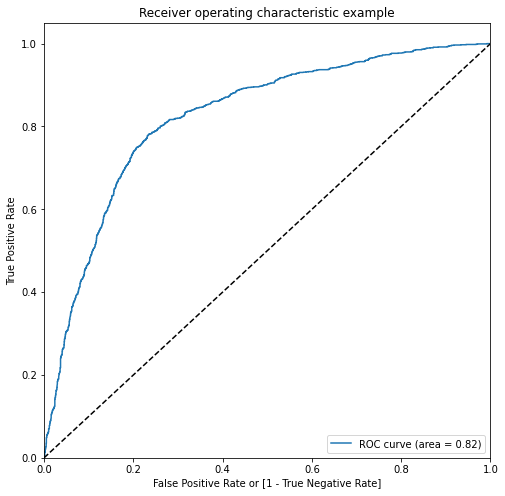

In [636]:
# Calculating FPR, TPR and Thresholds
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
# Plotting the ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### 4.3 Finding the Optimal Cutoff Point





In [637]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.823997,1,1,1,1,1,1,1,1,1,1,0
1,1,0.851397,1,1,1,1,1,1,1,1,1,1,0
2,1,0.809054,1,1,1,1,1,1,1,1,1,1,0
3,1,0.744024,1,1,1,1,1,1,1,1,1,0,0
4,0,0.202126,0,1,1,1,0,0,0,0,0,0,0


In [638]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.433710  1.000000  0.000000
0.1   0.1  0.507108  0.989298  0.137807
0.2   0.2  0.628082  0.935117  0.392930
0.3   0.3  0.733101  0.846823  0.646004
0.4   0.4  0.770525  0.772575  0.768955
0.5   0.5  0.764723  0.685619  0.825307
0.6   0.6  0.743545  0.584615  0.865266
0.7   0.7  0.711633  0.454849  0.908299
0.8   0.8  0.654772  0.257525  0.959016
0.9   0.9  0.586887  0.059532  0.990779


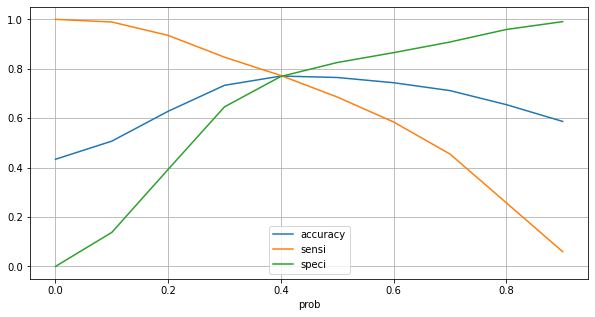

In [639]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize = (10,5))
plt.grid(True)
plt.show()

In [640]:
# From the curve above, 0.4 is the optimum point to take it as a cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)
y_test_pred_final['final_predicted'] = y_test_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.823997,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.851397,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.809054,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.744024,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.202126,0,1,1,1,0,0,0,0,0,0,0,0


In [641]:
#Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.823997,1,1,1,1,1,1,1,1,1,1,0,1,82
1,1,0.851397,1,1,1,1,1,1,1,1,1,1,0,1,85
2,1,0.809054,1,1,1,1,1,1,1,1,1,1,0,1,81
3,1,0.744024,1,1,1,1,1,1,1,1,1,0,0,1,74
4,0,0.202126,0,1,1,1,0,0,0,0,0,0,0,0,20


In [642]:
# Let's check the overall accuracy.
trainaccuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
testaccuracy= metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

confusion_TRN = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_TST = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )

### 4.4 Final Results

In [643]:
TP = confusion_TRN[1,1] # true positive 
TN = confusion_TRN[0,0] # true negatives
FP = confusion_TRN[0,1] # false positives
FN = confusion_TRN[1,0] # false negatives

TP_TST = confusion_TST[1,1] # true positive 
TN_TST = confusion_TST[0,0] # true negatives
FP_TST = confusion_TST[0,1] # false positives
FN_TST = confusion_TST[1,0] # false negatives

trainsensitivity= TP / float(TP+FN)
trainspecificity= TN / float(TN+FP)

testsensitivity= TP / float(TP_TST+FN_TST)
testspecificity= TN / float(TN_TST+FP_TST)

# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :77.05 %
Train Data Sensitivity :77.26 %
Train Data Specificity :76.9 %
Test Data Accuracy     :75.71 %
Test Data Sensitivity  :169.11 %
Test Data Specificity  :188.81 %


# Thank You!